<a href="https://colab.research.google.com/github/phinhannguyen04/Fake-Voice-Detection/blob/main/FakeVoice_CNN_with_Data2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **SET UP KAGGLE**

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

### **TẢI DATASET TỪ KAGGLE**

### **Tải các file fake audio**

In [ ]:
# ! kaggle datasets download andreadiubaldo/wavefake-test

In [ ]:
# ! unzip wavefake-test.zip

### **Đường dẫn đến folder fake các giọng bằng tiếng Anh**

In [ ]:
# fake = '/content/generated_audio/ljspeech_parallel_wavegan/'

In [ ]:
# # Thêm các thư viện
# import librosa
# import IPython.display as ipd

# y, sr = librosa.load(fake + 'LJ001-0001_gen.wav')
# ipd.Audio(y, rate=sr)


### **Tải file real audio**

In [ ]:
# ! kaggle datasets download mathurinache/the-lj-speech-dataset

In [ ]:
# ! unzip the-lj-speech-dataset.zip

In [ ]:
# real = '/content/LJSpeech-1.1/wavs/'

In [ ]:
# x, sr = librosa.load(real + 'LJ001-0001.wav')
# ipd.Audio(x, rate=sr)

Link dataset: https://www.kaggle.com/datasets/mohammedabdeldayem/the-fake-or-real-dataset

In [ ]:
# ! kaggle datasets download mohammedabdeldayem/the-fake-or-real-dataset

In [ ]:
# ! unzip the-fake-or-real-dataset.zip

## **CHUẨN BỊ DỮ LIỆU**

link: https://www.kaggle.com/datasets/utsavavaiya/release-audio-500

### **Tải dataset từ Kaggle**

In [ ]:
! kaggle datasets download utsavavaiya/release-audio-500

Dataset URL: https://www.kaggle.com/datasets/utsavavaiya/release-audio-500
License(s): unknown


### **Giải nén file vừa tải về**

In [ ]:
! unzip release-audio-500.zip

Archive:  release-audio-500.zip
  inflating: test_audio_500/fake/0.wav  
  inflating: test_audio_500/fake/1.wav  
  inflating: test_audio_500/fake/1008.wav  
  inflating: test_audio_500/fake/1015.wav  
  inflating: test_audio_500/fake/1030.wav  
  inflating: test_audio_500/fake/1051.wav  
  inflating: test_audio_500/fake/107.wav  
  inflating: test_audio_500/fake/1073.wav  
  inflating: test_audio_500/fake/1078.wav  
  inflating: test_audio_500/fake/1082.wav  
  inflating: test_audio_500/fake/1087.wav  
  inflating: test_audio_500/fake/1097.wav  
  inflating: test_audio_500/fake/1121.wav  
  inflating: test_audio_500/fake/1123.wav  
  inflating: test_audio_500/fake/1128.wav  
  inflating: test_audio_500/fake/1132.wav  
  inflating: test_audio_500/fake/1136.wav  
  inflating: test_audio_500/fake/1150.wav  
  inflating: test_audio_500/fake/1169.wav  
  inflating: test_audio_500/fake/117.wav  
  inflating: test_audio_500/fake/1170.wav  
  inflating: test_audio_500/fake/1203.wav  
  inflat

### **Xóa file zip sau khi giải nén**

In [ ]:
import os
os.remove("/content/release-audio-500.zip")

### **Đường dẫn chung**

In [ ]:
PATH = '/content/test_audio_500/'

In [ ]:
REAL_PATH = PATH + 'real/'
FAKE_PATH = PATH + 'fake/'

### **Kiểm tra độ dài của mỗi folder**

In [ ]:
print(len(os.listdir(REAL_PATH)))
print(len(os.listdir(FAKE_PATH)))

500
500


### Kiểm tra các tệp âm thanh

In [ ]:
import librosa
import IPython.display as ipd

# file real
f1, sr = librosa.load(REAL_PATH + '/1002.wav')
ipd.Audio(f1, rate=sr)

In [ ]:
# Tính thời gian của f1
f1_time = librosa.times_like(f1, sr=sr)
print(f1_time)

[0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.80622440e+03
 2.80624762e+03 2.80627084e+03]


In [ ]:
# file fake
f2, sr = librosa.load(FAKE_PATH + '/1008.wav')
ipd.Audio(f2, rate=sr)

In [ ]:
# Tính thời gian của f2
f2_time = librosa.times_like(f2, sr=sr)
print(f2_time)

[0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 1.07364426e+03
 1.07366748e+03 1.07369070e+03]


## **XỬ LÝ DỮ LIỆU**

### **Biểu đồ tần số của hai loại âm thanh**

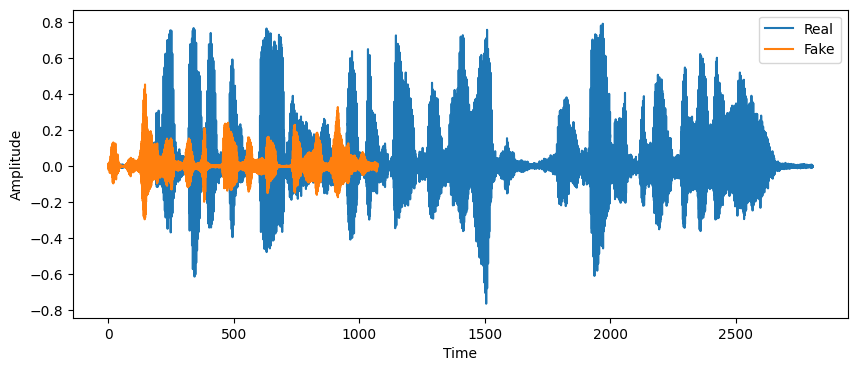

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(f1_time, f1)
plt.plot(f2_time, f2)
plt.legend(['Real', 'Fake'])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

### **Hàm chuyển đổi từ tần số sang MFCC**

In [ ]:
RATE = 16000

Số lượng 13 cho tham số n_mfcc trong việc trích xuất MFCC (Mel-frequency Cepstral Coefficients) thường được chọn vì lý do sau:

**1. Dựa trên đặc điểm của thính giác con người:**
- MFCC được thiết kế để mô phỏng cách tai người cảm nhận âm thanh. Tai người có độ nhạy tốt nhất trong các tần số thấp và giảm dần ở tần số cao hơn.

- 13 hệ số đầu tiên thường là đủ để đại diện cho thông tin quan trọng nhất của tín hiệu âm thanh, bao gồm cả đặc điểm phổ và tần số quan trọng.

**2. Tính cân đối giữa thông tin và kích thước:**
- Khi chọn n_mfcc = 13, bạn có được thông tin tóm gọn nhưng vẫn giữ được đặc trưng quan trọng của âm thanh.

- Quá ít hệ số sẽ làm mất thông tin đặc trưng, trong khi quá nhiều hệ số sẽ dẫn đến dư thừa, làm tăng kích thước dữ liệu và yêu cầu tính toán.

**3. Tiêu chuẩn trong xử lý âm thanh:**
- Trong các bài toán như nhận dạng giọng nói (speech recognition), n_mfcc = 13 là tiêu chuẩn phổ biến nhờ hiệu quả của nó.

- Các hệ số cao hơn 13 thường biểu diễn nhiễu hoặc thông tin không quan trọng trong âm thanh.

**4. Tương thích với thuật toán học máy:**
- Với n_mfcc = 13, dữ liệu trích xuất đủ nhỏ để xử lý dễ dàng, đồng thời vẫn chứa đựng đặc trưng quan trọng để phân loại hoặc nhận diện.

Nguồn tham khảo:

https://iq.opengenus.org/mfcc-audio/

In [ ]:
#-----------------------------------------------------------------
# Hàm chuyển đổi tần một tệp âm thanh sang MFCC trả về
#   :param wav (numpy array): Wav form
#   :return (2d numpy array: MFCC
#-----------------------------------------------------------------
def to_mfcc (audio, RATE=RATE, N_MFCC=13):
  # y, sr = librosa.load(audio)
  spectro_gram = librosa.feature.mfcc(y=audio, sr=RATE, n_mfcc=N_MFCC)
  return spectro_gram




### **Hàm load âm thanh**

In [ ]:
#-----------------------------------------------------------------
# Hàm lấy âm thanh từ đường dẫn
#    :param language_num (list): list of file names
#    :return (numpy array): Down-sampled wav file
#-----------------------------------------------------------------
def get_wav(audio_path, RATE=RATE):
    y, sr = librosa.load(audio_path)
    return(librosa.core.resample(y=y,orig_sr=sr,target_sr=RATE, scale=True))

## **Chuẩn hóa độ dài âm thanh bằng librosa.util.fix_length**

Nguồn tham khảo: https://stackoverflow.com/questions/52841335/how-can-i-pad-wav-file-to-specific-length

- Nếu độ dài của file âm thanh ngắn hơn độ dài mục tiêu, librosa.util.fix_length() sẽ thêm các mẫu 0 vào cuối file âm thanh (padding).
- Nếu độ dài của file âm thanh dài hơn độ dài mục tiêu, librosa.util.fix_length() sẽ cắt bớt các mẫu thừa ở cuối file âm thanh (truncating).
- Bạn có thể thay đổi target_duration để điều chỉnh độ dài mục tiêu theo nhu cầu của bạn.
- Bạn cũng có thể sử dụng các tham số khác của librosa.util.fix_length() để điều chỉnh hành vi của hàm, ví dụ như axis và mode (để thay đổi phương pháp padding).

16 kHz: Được sử dụng phổ biến trong các ứng dụng nhận dạng giọng nói và các ứng dụng có băng thông hạn chế.
Nguồn thông tin: https://en.wikipedia.org/wiki/Hearing_range

### **Giải thuật cắt ngắn âm thanh**


In [ ]:
#------------------------------------------------------------------------------
# Hàm chuẩn hóa kích thước của âm thanh
#     : audio_path: đường dẫn của file âm thanh
#     : target_duration: thời lượng cần lấy
#     : standar_sr: tần số tiêu chuẩn
#------------------------------------------------------------------------------
def fix_length (audio_paths, target_duration=2, standard_sr = 16000):

  # Tính toán số lượng mẫu tương ứng với độ dài mục tiêu
  target_samples = target_duration * standard_sr

  # Chuẩn hóa độ dài cho tất cả các file âm thanh
  fixed_audios = []
  for audio_path in audio_paths:
      audio, _ = librosa.load(audio_path, sr=sr)  # Đọc file âm thanh với sample rate đã lấy
      fixed_audio = librosa.util.fix_length(audio, size=target_samples)
      fixed_audios.append(fixed_audio)

  return fixed_audios


### **Hàm chuyển đổi sang Mel-spectrogram (đáp ứng yêu cầu bài toán)**

Lý do:

**Mel-spectrogram:**

Ưu điểm:

- Biểu diễn trực quan: Mel-spectrogram giữ lại cấu trúc thời gian - tần số của tín hiệu, giúp dễ dàng hiểu và phân tích khi được vẽ dưới dạng đồ thị.

- Thông tin đầy đủ hơn: Vì không áp dụng phép biến đổi DCT, Mel-spectrogram lưu giữ các thông tin tần số nguyên bản hơn, rất hữu ích cho các mô hình học sâu như CNN (Convolutional Neural Networks).

- Hiệu quả với mô hình mạnh: Khi sử dụng các bộ phân loại mạnh (như CNN hoặc Transformer) và dữ liệu lớn, Mel-spectrogram thường mang lại hiệu suất cao hơn.

Nhược điểm:

- Kích thước lớn: Dữ liệu Mel-spectrogram có kích thước lớn hơn MFCC, làm tăng yêu cầu tính toán.

- Không "giải tương quan": Các dải tần Mel-spectrogram không được giải tương quan, có thể không phù hợp với các mô hình tuyến tính.

**Nguồn tham khảo tại mlarchive.com**
https://mlarchive.com/machine-learning/the-ultimate-guide-for-sound-features-and-their-applications/





**Nguồn tham khảo**:

---
https://tiensu.github.io/blog/68_audio_deep_learning_part_2/


**Nguồn tham khảo tại** https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53

Giải thích:

- librosa.feature.melspectrogram(y=audio, sr=sr): Tính toán phổ Mel từ tín hiệu âm thanh audio với tần số lấy mẫu sr. Kết quả là phổ Mel tuyến tính (power spectrogram).

- librosa.power_to_db(mel_spectrogram, ref=np.max): Chuyển đổi phổ Mel tuyến tính sang thang decibel (dB) bằng cách sử dụng np.max làm giá trị tham chiếu. Điều này có nghĩa là giá trị lớn nhất trong phổ Mel sẽ được đặt là 0 dB, và các giá trị khác sẽ được tính toán tương đối so với giá trị này



> (sử dụng power_to_db và np.max): Thường được sử dụng phổ biến hơn trong các ứng dụng học sâu vì nó giúp chuẩn hóa dữ liệu tốt hơn.

In [ ]:
import numpy as np

def to_mel_spectrogram(audio, RATE=RATE, N_FFT=2048, hop_length=512):
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    return mel_spectrogram_db

#### Thay đổi kích thước phổ mel spectrogram cho giống phổ trong mô hình

In [ ]:
def resize_mel_spectrogram(mel_spectrogram, target_shape=(128, 63)):
    return librosa.util.fix_length(mel_spectrogram, size=target_shape[1], axis=1)[:, :target_shape[1]]

#### Tăng cường dữ liệu

In [ ]:
def normalize_mel_spectrogram(mel_spectrogram):
    return (mel_spectrogram - np.mean(mel_spectrogram)) / np.std(mel_spectrogram)

#### Reshape phổ Mel

In [ ]:
def reshape_mel_spectrogram(mel_spectrogram):
    return mel_spectrogram[:, :, np.newaxis]

In [ ]:
sample = get_wav(REAL_PATH + '1002.wav')

In [ ]:
mel_spec = to_mel_spectrogram(sample)

### Hàm biểu diễn mel_spectrogram

In [ ]:
def show_mel_spectrogram(mel_spec, RATE=RATE):
  librosa.display.specshow(mel_spec, sr=RATE, x_axis='time', y_axis='mel')
  plt.colorbar(format='%+2.0f dB')

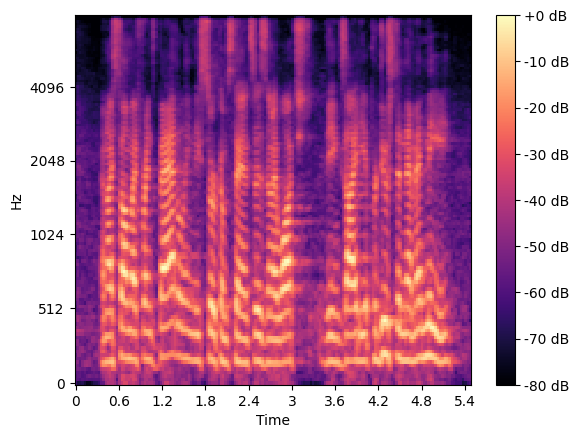

In [ ]:
show_mel_spectrogram(mel_spec)

### **Hàm tính Mel spectrogram tổng quát**

In [ ]:
def calculate(audio_data, sr=RATE):
    mels = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_fft=2048, hop_length=512)
    mel_spectrogram_db = librosa.power_to_db(mels, ref=np.max)
    return mel_spectrogram_db

In [ ]:
def preprocess(audio_data, sr = 16000):
  # audio, sr = librosa.load(file_path)
  mel_spectrogram = to_mel_spectrogram(audio_data, sr)
  mel_spectrogram = resize_mel_spectrogram(mel_spectrogram)
  mel_spectrogram = normalize_mel_spectrogram(mel_spectrogram)
  mel_spectrogram = reshape_mel_spectrogram(mel_spectrogram)
  return mel_spectrogram

## **CHUẨN HÓA DỮ LIỆU**

## Tạo lần lượt 2 mảng REAL_FILE và FAKE_FILE để lưu đường dẫn các tập tin có trong thư mục real và fake.

Lấy từ file đầu tiên đến file thứ n - 1 của mỗi folder, file cuối cùng sẽ dùng để đánh giá kết quả train mô hình.

In [ ]:
REAL_FILES = []
FAKE_FILES = []

In [ ]:
print(os.path.join(REAL_PATH, os.listdir(REAL_PATH)[0]))
print(os.path.join(FAKE_PATH, os.listdir(FAKE_PATH)[0]))

/content/test_audio_500/real/1395.wav
/content/test_audio_500/fake/1459.wav


In [ ]:
for file in range(len(os.listdir(REAL_PATH))):
  REAL_FILES.append(os.path.join(REAL_PATH, os.listdir(REAL_PATH)[file]))


for file in range(len(os.listdir(FAKE_PATH))):
  FAKE_FILES.append(os.path.join(FAKE_PATH, os.listdir(FAKE_PATH)[file]))

print(len(REAL_FILES))
print(len(FAKE_FILES))

500
500


### Lấy ra file còn lại ở mỗi thư mục

In [ ]:
real_file_test = REAL_FILES[-1]
fake_file_test = FAKE_FILES[-1]

In [ ]:
print(real_file_test)
print(fake_file_test)

/content/test_audio_500/real/6878.wav
/content/test_audio_500/fake/3227.wav


In [ ]:
y_real, sr = librosa.load(real_file_test)
ipd.Audio(y_real, rate=sr)

In [ ]:
y_fake, sr = librosa.load(fake_file_test)
ipd.Audio(y_fake, rate=sr)

### **Gộp cả hai dataset lại**


## Kết hợp 2 thư mục

In [ ]:
dataset = REAL_FILES[:-1] + FAKE_FILES[:-1]

In [ ]:
print(len(dataset))
print(('real' in dataset[0]))

998
True


Nguồn tham khảo: https://www.kaggle.com/code/nilshmeier/melspectrogram-based-cnn-classification#Data-Exploration

In [ ]:
feature_list = []
label_list = []

In [ ]:
# Áp dụng hàm fix length
fixed_audios = fix_length(dataset)

## (Bỏ) Chuẩn hóa các file âm thanh về cùng một kích thước

In [ ]:
for i, audio_data in enumerate(fixed_audios):
  mel_spec = preprocess(audio_data)
  feature_list.append(mel_spec.reshape((128, 63, 1)))
  if 'real' in dataset[i]:
    label_list.append(1)
  else:
    label_list.append(0)

features = np.array(feature_list)
labels = np.array(label_list)

In [ ]:
print(features.shape)
print(labels.shape)

(998, 128, 63, 1)
(998,)


In [ ]:
print(labels[-1])
print(labels[1])

0
1


### **Chia tập dữ liệu**

Nguồn tham khảo: https://towardsdatascience.com/cnns-for-audio-classification-6244954665ab/

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

import tensorflow as tf
from tensorflow import keras
from keras import models, layers

### Tạo model

In [ ]:
model = keras.Sequential(layers=[
        keras.layers.InputLayer(shape=features[0].shape),
        keras.layers.Conv2D(16, 3, padding='same', activation=keras.activations.relu),
        keras.layers.MaxPooling2D(2),

        # keras.layers.Conv2D(32, 3, padding='same', activation=keras.activations.relu),
        # keras.layers.MaxPooling2D(2),

        keras.layers.Flatten(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation=keras.activations.relu),
        keras.layers.Dense(2, activation=keras.activations.sigmoid) # phân loại nhị phân
    ])
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 63, 16)         │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 31744)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31744)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,063,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,063,778 (15.50 MB)

 Trainable params: 4,063,778 (15.50 MB)

 Non-trainable params: 0 (0.00 B)

None


# Train model

In [ ]:
TEST_SIZE = 0.2
BATCH_SIZE = 128
EPOCHS = 10

# Encode Labels: nhận diện một trong hai lable
encoded_labels = tf.one_hot(indices=labels, depth=2)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels.numpy(), test_size=TEST_SIZE)

# Chia tập huấn luyện thành tập huấn luyện và tập xác thực
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=TEST_SIZE, random_state=42)



In [ ]:
len(X_train), len(X_val), len(X_test)

(638, 160, 200)

In [ ]:
print(X_val.shape)
print(y_val.shape)

(160, 128, 63, 1)
(160, 2)


In [ ]:
# Tạo tf.data.Dataset cho tập huấn luyện
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(BATCH_SIZE)

# Tạo tf.data.Dataset cho tập xác thực
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(BATCH_SIZE)

In [ ]:
import time
from sklearn.metrics import roc_auc_score, matthews_corrcoef, f1_score

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Thời gian bắt đầu
start_time = time.time()
# Chạy mô hình
history = model.fit(train_dataset, validation_data=val_dataset, epochs=EPOCHS, callbacks=[early_stopping])
# Thời gian kết thúc
end_time = time.time()

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 668ms/step - accuracy: 0.4859 - loss: 1.8951 - val_accuracy: 0.5375 - val_loss: 1.2625
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 617ms/step - accuracy: 0.7138 - loss: 0.7659 - val_accuracy: 0.9375 - val_loss: 0.5343
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 607ms/step - accuracy: 0.9485 - loss: 0.4161 - val_accuracy: 0.9438 - val_loss: 0.2075
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 912ms/step - accuracy: 0.9623 - loss: 0.1455 - val_accuracy: 0.9312 - val_loss: 0.1771
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 609ms/step - accuracy: 0.9680 - loss: 0.1191 - val_accuracy: 0.9438 - val_loss: 0.1618
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 554ms/step - accuracy: 0.9700 - loss: 0.1040 - val_accuracy: 0.9438 - val_loss: 0.1483
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 828ms/step - accuracy: 0.9734 - loss: 0.0913 - val_accuracy: 0.9375 - val_loss: 0.1411
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 624ms/step - accuracy: 0.9852 - loss: 0.0630 - val_accuracy: 0.9500 - val_loss:

In [ ]:
# Tính thời gian huấn luyện
training_time = end_time - start_time

# Giả sử mô hình của bạn dự đoán xác suất cho hai lớp
y_pred_proba = model.predict(X_val)

# Lấy lớp dự đoán có xác suất cao nhất
y_pred = np.argmax(y_pred_proba, axis=1)

# Lấy nhãn thực tế từ y_val
y_true = np.argmax(y_val, axis=1)

# Tính toán các độ đo
auc = roc_auc_score(y_true, y_pred_proba[:, 1])  # Lấy xác suất lớp 1
mcc = matthews_corrcoef(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
acc = history.history['accuracy'][-1]

# In kết quả
print(f"Accuracy: {acc:.4f}")
print(f"AUC: {auc:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Thời gian chạy mô hình: {training_time}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Accuracy: 0.9875
AUC: 0.9911
MCC: 0.8876
F1-score: 0.9441
Thời gian chạy mô hình: 46.70336294174194


## Biểu diễn đồ thị loss function

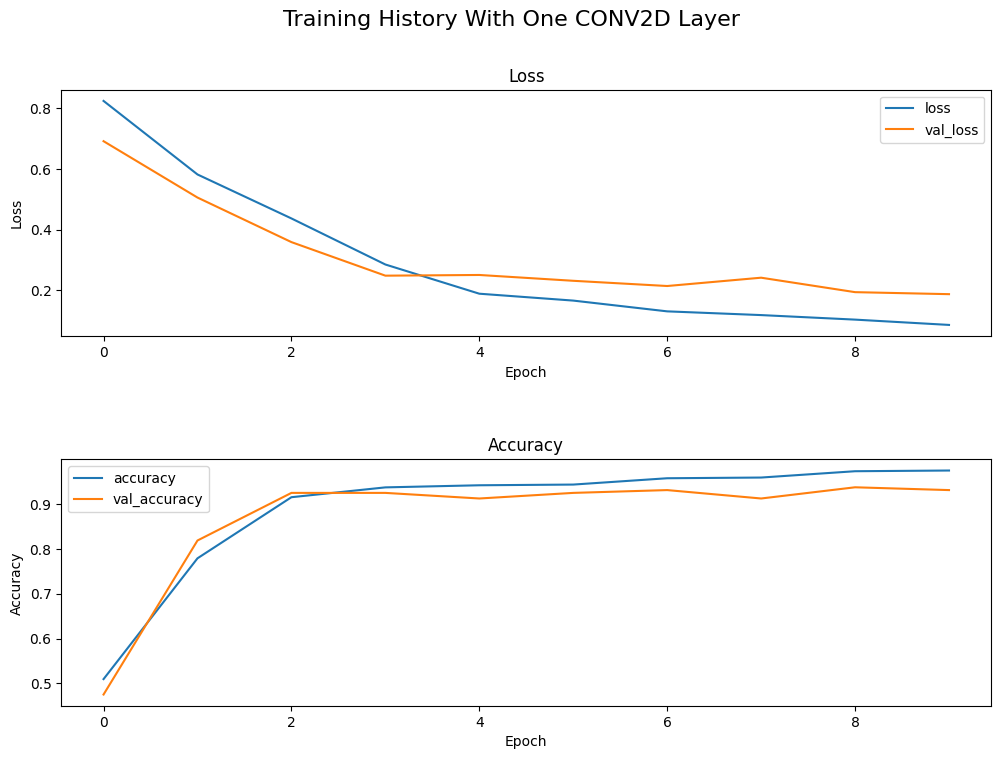

In [ ]:

fig, axs = plt.subplots(2, 1, figsize=(12, 8))

fig.suptitle('Training History With One CONV2D Layer', fontsize=16)

axs[0].plot(history.epoch, history.history['loss'], history.history['val_loss'])
axs[0].set(title='Loss', xlabel='Epoch', ylabel='Loss')
axs[0].legend(['loss', 'val_loss'])

axs[1].plot(history.epoch, history.history['accuracy'], history.history['val_accuracy'])
axs[1].set(title='Accuracy', xlabel='Epoch', ylabel='Accuracy')
axs[1].legend(['accuracy', 'val_accuracy'])

plt.subplots_adjust(hspace=0.5)

plt.show()

# **Nhận xét**

## Biểu diễn trên ma trận nhầm lẫn cho thấy
- Có 137 mãu(label 0) và 108 mẫu (label 1) được phân loại đúng
- Có 14 mẫu(label 0) bị dự đoán sai thành mẫu(label 1)
- Có 41 mẫu(label 1) bị dự đoán sai thành mẫu(label 0)

## Đánh giá hiệu xuất
- Độ chính xác (Accuracy):
- Độ chính xác của lớp 0:
- Độ chính xác của lớp 1:
- Độ bao phủ của lớp 0:
- Độ bao phủ của lớp 1:

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


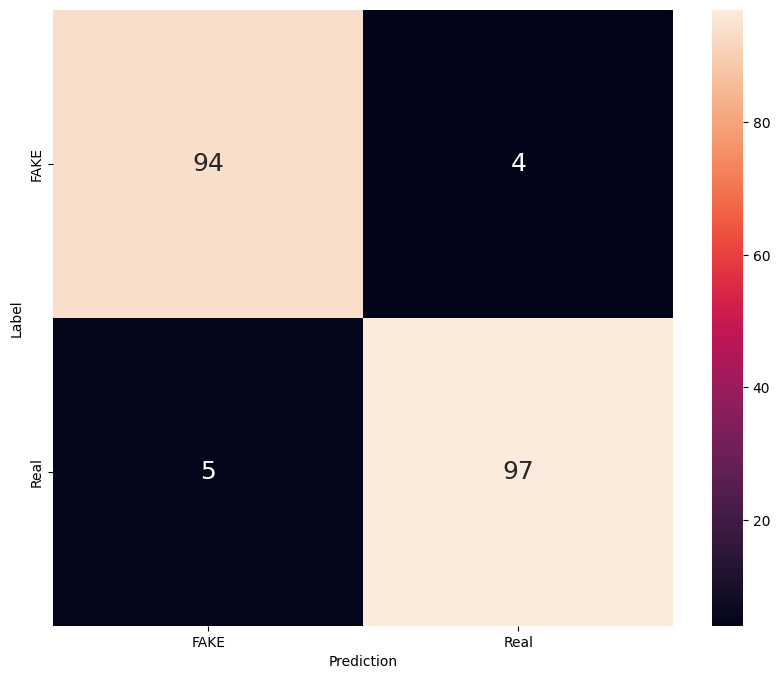

In [ ]:
import seaborn as sns

y_predicted = np.argmax(model.predict(x=X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
label_names = np.unique(["Real", "FAKE"])
confusion_matrix = tf.math.confusion_matrix(labels=y_true, predictions=y_predicted)
fig = plt.figure()
fig.set_size_inches(10, 8)
sns.heatmap(confusion_matrix, xticklabels=label_names, yticklabels=label_names, annot=True, fmt='g', annot_kws={"size": 18})
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

# **Chuyển từ file đầu vào thành tensor**

In [ ]:
def preprocess_audio(file_path):
  audio, sr = librosa.load(file_path)
  mel_spectrogram = to_mel_spectrogram(audio, sr)
  mel_spectrogram = resize_mel_spectrogram(mel_spectrogram)
  mel_spectrogram = normalize_mel_spectrogram(mel_spectrogram)
  mel_spectrogram = reshape_mel_spectrogram(mel_spectrogram)
  return mel_spectrogram

#### Hàm dự đoán

In [ ]:
def get_label(prediction, threshold):
    if prediction[0][1] > threshold:
        return 1
    else:
        return 0

#### Lấy ra kết quả dự đoán

In [ ]:
def predict_audio(file_path, model, threshold=0.5):
    mel_spectrogram = preprocess_audio(file_path)
    prediction = model.predict(np.expand_dims(mel_spectrogram, axis=0))
    label = get_label(prediction, threshold)
    return prediction, label

In [ ]:
# Kiểm tra kích thước đầu vào của mô hình
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 63, 16)         │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 31744)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31744)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,063,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,191,336 (46.51 MB)

 Trainable params: 4,063,778 (15.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,127,558 (31.00 MB)

In [ ]:
# Tiền xử lý
prediction, label = predict_audio(fake_file_test, model)
# label = get_label(prediction)

# Kết quả
print(f"File âm thanh được dự đoán là: {label}")
print(f"Xác xuất: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
File âm thanh được dự đoán là: 0
Xác xuất: [[0.853959   0.07918695]]


# **Kết nối test với chuỗi file khác đã chuẩn bị**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
FOLDER_PATH = '/content/drive/MyDrive/GGCOLAB/AUDIO/DEMONSTRATION'

In [ ]:
FILE_TESTS = []
for file in os.listdir(FOLDER_PATH):
  FILE_TESTS.append(os.path.join(FOLDER_PATH, file))

for file in FILE_TESTS:
  print(file)

/content/drive/MyDrive/GGCOLAB/AUDIO/DEMONSTRATION/linus-to-musk-DEMO.wav
/content/drive/MyDrive/GGCOLAB/AUDIO/DEMONSTRATION/linus-original-DEMO.wav
/content/drive/MyDrive/GGCOLAB/AUDIO/DEMONSTRATION/nnhan01.m4a
/content/drive/MyDrive/GGCOLAB/AUDIO/DEMONSTRATION/real01.wav
/content/drive/MyDrive/GGCOLAB/AUDIO/DEMONSTRATION/fake01.wav


### Dữ liệu test được chuẩn bị
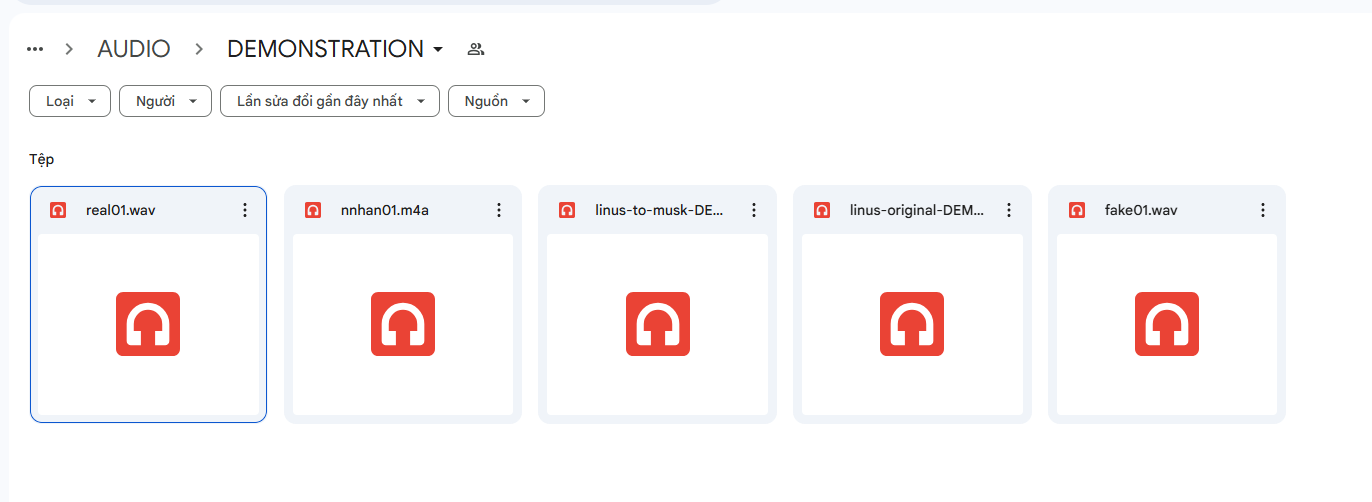

In [ ]:
# Test file
for file in FILE_TESTS:
  prediction, label = predict_audio(file, model)
  # label = get_label(prediction)
  print(f"File âm thanh được dự đoán là: {label}")
  print(f"Xác xuất: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
File âm thanh được dự đoán là: 1
Xác xuất: [[0.24576986 0.76252365]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
File âm thanh được dự đoán là: 0
Xác xuất: [[0.7363296  0.15554398]]


<ipython-input-83-87caf4857489>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
File âm thanh được dự đoán là: 0
Xác xuất: [[0.49603975 0.41838485]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
File âm thanh được dự đoán là: 1
Xác xuất: [[0.06932681 0.94540197]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
File âm thanh được dự đoán là: 1
Xác xuất: [[0.21273318 0.679907  ]]


### MÔ HÌNH CNN VỚI LỚP 2 LỚP CONV2D

In [ ]:
'''
XÂY DỰNG MÔ HÌNH
'''
model = keras.Sequential(layers=[
        keras.layers.InputLayer(shape=features[0].shape),
        keras.layers.Conv2D(16, 3, padding='same', activation=keras.activations.relu),
        keras.layers.MaxPooling2D(2),

        keras.layers.Conv2D(32, 3, padding='same', activation=keras.activations.relu),
        keras.layers.MaxPooling2D(2),

        keras.layers.Flatten(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation=keras.activations.relu),
        keras.layers.Dense(2, activation=keras.activations.sigmoid) # phân loại nhị phân
    ])
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
print(model.summary())

'''
CHIA DỮ LIỆU
'''

TEST_SIZE = 0.2
BATCH_SIZE = 128
EPOCHS = 10

# Encode Labels: nhận diện một trong hai lable
encoded_labels = tf.one_hot(indices=labels, depth=2)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels.numpy(), test_size=TEST_SIZE)

# Chia tập huấn luyện thành tập huấn luyện và tập xác thực
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=TEST_SIZE, random_state=42)

'''
TẠO DATASET
'''

# Tạo tf.data.Dataset cho tập huấn luyện
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(BATCH_SIZE)

# Tạo tf.data.Dataset cho tập xác thực
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(BATCH_SIZE)


'''
TRAIN MODEL
'''

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Thời gian bắt đầu
start_time = time.time()
# Chạy mô hình
history = model.fit(train_dataset, validation_data=val_dataset, epochs=EPOCHS, callbacks=[early_stopping])
# Thời gian kết thúc
end_time = time.time()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 128, 63, 16)         │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 31, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 15360)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15360)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,966,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,971,266 (7.52 MB)

 Trainable params: 1,971,266 (7.52 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 891ms/step - accuracy: 0.4974 - loss: 0.8492 - val_accuracy: 0.4750 - val_loss: 0.6917
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 837ms/step - accuracy: 0.6896 - loss: 0.6153 - val_accuracy: 0.8188 - val_loss: 0.5055
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8900 - loss: 0.4635 - val_accuracy: 0.9250 - val_loss: 0.3584
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9361 - loss: 0.3083 - val_accuracy: 0.9250 - val_loss: 0.2476
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9457 - loss: 0.1850 - val_accuracy: 0.9125 - val_loss: 0.2499
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 828ms/step - accuracy: 0.9435 - loss: 0.1837 - val_accuracy: 0.9250 - val_loss: 0.2306
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 870ms/step - accuracy: 0.9495 - loss: 0.1470 - val_accuracy: 0.9312 - val_loss: 0.2134
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9559 - loss: 0.1173 - val_accuracy: 0.9125 - val_loss: 0.240

### BIỂU DIỄN KẾT QUẢ VỚI CNN MODEL 2 LỚP CONV2D

In [ ]:
'''
CÁC HÌNH THỨC BIỂU DIỄN
'''

# Tính thời gian huấn luyện
training_time = end_time - start_time

# Giả sử mô hình của bạn dự đoán xác suất cho hai lớp
y_pred_proba = model.predict(X_val)

# Lấy lớp dự đoán có xác suất cao nhất
y_pred = np.argmax(y_pred_proba, axis=1)

# Lấy nhãn thực tế từ y_val
y_true = np.argmax(y_val, axis=1)

# Tính toán các độ đo
auc = roc_auc_score(y_true, y_pred_proba[:, 1])  # Lấy xác suất lớp 1
mcc = matthews_corrcoef(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
acc = history.history['accuracy'][-1]

# In kết quả
print(f"Accuracy: {acc:.4f}")
print(f"AUC: {auc:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Thời gian chạy mô hình: {training_time}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Accuracy: 0.9749
AUC: 0.9801
MCC: 0.8634
F1-score: 0.9252
Thời gian chạy mô hình: 61.477978467941284


### BIỂU ĐỒ

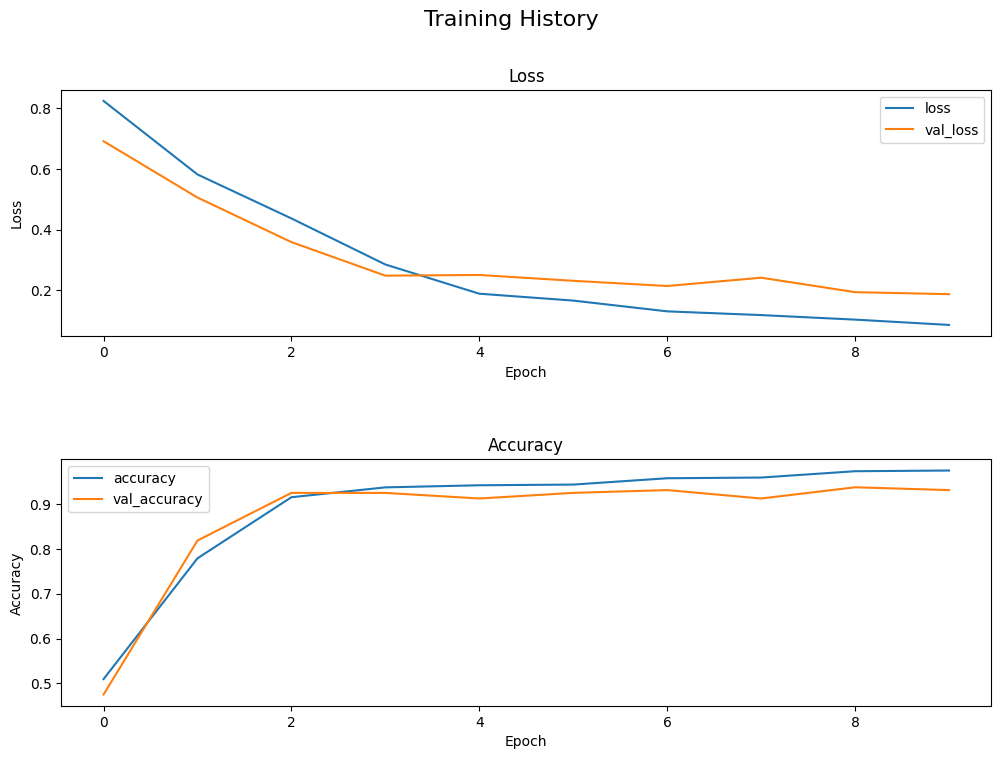

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

fig.suptitle('Training History', fontsize=16)

axs[0].plot(history.epoch, history.history['loss'], history.history['val_loss'])
axs[0].set(title='Loss', xlabel='Epoch', ylabel='Loss')
axs[0].legend(['loss', 'val_loss'])

axs[1].plot(history.epoch, history.history['accuracy'], history.history['val_accuracy'])
axs[1].set(title='Accuracy', xlabel='Epoch', ylabel='Accuracy')
axs[1].legend(['accuracy', 'val_accuracy'])

plt.subplots_adjust(hspace=0.5)

plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


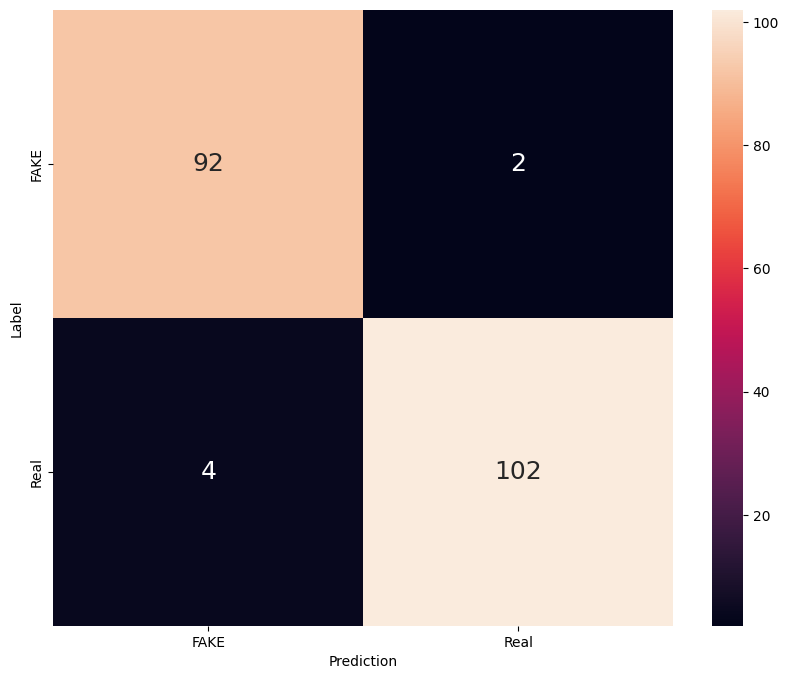

In [ ]:
import seaborn as sns

y_predicted = np.argmax(model.predict(x=X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
label_names = np.unique(["Real", "FAKE"])
confusion_matrix = tf.math.confusion_matrix(labels=y_true, predictions=y_predicted)
fig = plt.figure()
fig.set_size_inches(10, 8)
sns.heatmap(confusion_matrix, xticklabels=label_names, yticklabels=label_names, annot=True, fmt='g', annot_kws={"size": 18})
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()